<a href="https://colab.research.google.com/github/Devonte202/maternal-morbitity/blob/master/ChildBirthMortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
exampleRow = "        201801    12272        11                1                        30105    1                   2011011 0  011 X1  16 1                    310501101   11173 1     010002  2  4               01602   03304   01602     0311          08  051      N10000000000001111N1         66130.74    1901   231 14151     NNNNNN111111NXX111N00 111     NNNNN111111      NN 11                  NNNYNY1111110     11X111111     NNNNN 11111 1     1N2211     0941885   1    9               M 04  2017     38062    400823657 083     NNNNNN 111111 1     NNNNNN111111NNNNNN1111111     NYY1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       "

raceDictionary = {
    "01": "White (only)",
    "02": "Black (only)",
    "03": "AIAN (only)",
    "04": "Asian Indian (only)",
    "05": "Chinese (only)",
    "06": "Filipino (only)",
    "07": "Japanese (only)",
    "08": "Korean (only)" "Korean (only)",
    "09": "Vietnamese (only)",
    "10": "Other Asian (only)",
    "11": "Hawaiian (only)",
    "12": "Guamanian (only)",
    "13": "Samoan (only)",
    "14": "Other Pacific Islander (only)",
    "15": "More than one race",
}

prenatalVisitsDictionary = {
    "01": "No visits",
    "02": "1 to 2 visits",
    "03": "3 to 4 visits",
    "04": "5 to 6 visits",
    "05": "7 to 8 visits",
    "06": "9 to 10 visits",
    "07": "11 to 12 visits",
    "08": "13 to 14 visits",
    "09": "15 to 16 visits",
    "10": "17 to 18 visits",
    "11": "19 or more visits",
    "12": "Unknown or not stated",
}

mothersAgeDictionary = {
    "1": "Under 15 years",
    "2": "15-19 years",
    "3": "20-24 years",
    "4": "25-29 years",
    "5": "30-34 years",
    "6": "35-39 years",
    "7": "40-44 years",
    "8": "45-49 years",
    "9": "50-54 years",
}

maternal_morbidity = {
    "0": "Maternal Morbidity Reported",
    "1": "No Maternal Morbidity Reported",
    "9": "Unknown",
}  # 1 Means None reported

complication_reported = {"Y": "Yes", "N": "No", "U": "Unknown"}


def formatLine(line: str):
    """
    Race, PrenatalVisists, mothers Age, Maternal Morbidity
    """
    indices = {
        "race": raceDictionary[line[107:109]],
        "prenatal_visits": prenatalVisitsDictionary[line[241:243]],
        "mother_age": mothersAgeDictionary[line[78:79]],
        "maternal_morbidity": maternal_morbidity[line[426:427]],
        "maternal_transfusion": complication_reported[line[414:415]]
        + " "
        + "Transfusion",
        "perineal_laceration": complication_reported[line[415:416]]
        + " "
        + "Perineal Laceration",
        "ruptured_uterus": complication_reported[line[416:417]]
        + " "
        + "Ruptured Uterus",
        "unplanned_hysterectomy": complication_reported[line[417:418]]
        + " "
        + "Unplanned Hysterectomy",
        "admit_to_intensive_care": complication_reported[line[418:419]]
        + " "
        + "Intensive Care",
    }
    return ", ".join(list(indices.values()))


f = open("results2.txt", "a")

# natality2018file = open("Nat2018PublicUS.c20190509.r20190717.txt", "r")

# i = 1
for line in natality2018file:
    # if i >= 2:
    #     break
    f.write(formatLine(line))
    f.write("\n")
    # i += 1

natality2018file.close()
f.close()


NameError: ignored

In [ ]:
from google.colab import drive
from sklearn import preprocessing
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import pickle
import math


In [ ]:
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/first_round_results_encoded.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [ ]:
def createBalancedData(dataFrame, target, count):
  balancedDF = pd.DataFrame()
  for klass in dataFrame[target].unique():
    # if 14 acocunts for 1/6th of the data, then don't include?
    outlyerADf = dataFrame.loc[dataFrame['RACE_ENCODED'] == 14]
    NormalizedOutlyerADf = outlyerADf.sample(n=math.ceil(count/3), replace=False)
    outlyerBDf = dataFrame.loc[dataFrame['RACE_ENCODED'] == 2]
    NormalizedOutlyerBDf = outlyerBDf.sample(n=math.ceil(count/3), replace=True)
    distributedDf = dataFrame.loc[dataFrame['RACE_ENCODED'] != 14]
    distributedDf = distributedDf.loc[dataFrame['RACE_ENCODED'] != 2]
    df = distributedDf.loc[distributedDf[target] == klass]
    dfRandom = df.sample(n=math.ceil(count/3 * 1), replace=True)
    balancedDF = pd.concat([balancedDF, dfRandom, NormalizedOutlyerADf, NormalizedOutlyerBDf])
  return balancedDF

In [ ]:
balancedDF = createBalancedData(df, 'MATERNAL_TRANSFUSION_ENCODED', 200000)
balancedDF.to_csv('/drive/My Drive/first_round_results_encoded_balanced5k.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balancedDF[['RACE_ENCODED', 'PRENATAL_VISITS_ENCODED', 'MOTHERS_AGE_ENCODED']], balancedDF[['MATERNAL_TRANSFUSION_ENCODED']], test_size=0.3)

In [ ]:
X_train.shape

(420002, 3)

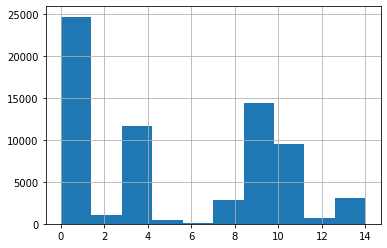

In [ ]:
balancedDF.where(balancedDF['MATERNAL_TRANSFUSION_ENCODED'] == 2)['RACE_ENCODED'].hist()

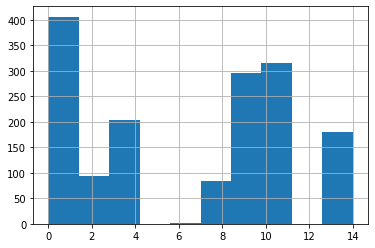

In [ ]:
balancedDF.where(balancedDF['RUPTURED_UTERUS_ENCODED'] == 2)['RACE_ENCODED'].hist()

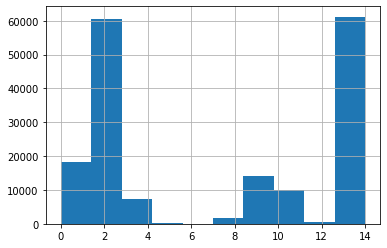

In [ ]:
balancedDF.where(balancedDF['MOTHERS_AGE_ENCODED'] == 2)['RACE_ENCODED'].hist()

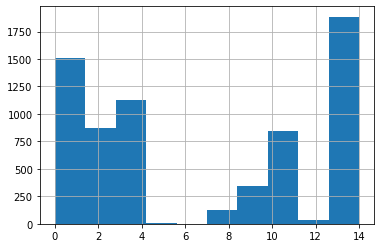

In [ ]:
balancedDF.where(balancedDF['PERINEAL_LACERATION_ENCODED'] == 2)['RACE_ENCODED'].hist()

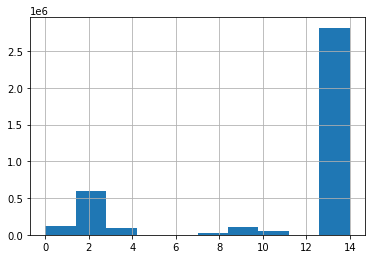

In [ ]:
df['RACE_ENCODED'].hist()

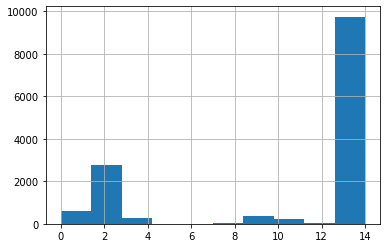

In [ ]:
balancedDF.where(balancedDF['UNPLANNED_HYSTERECTOMY_ENCODED'] == 0)['RACE_ENCODED'].hist()

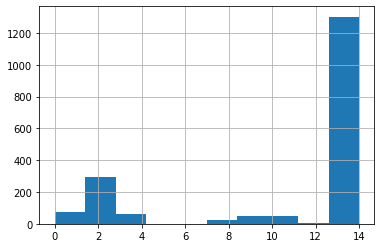

In [ ]:
balancedDF.where(balancedDF['INTENSIVE_CARE_ENCODED'] == 2)['RACE_ENCODED'].hist()

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
randomForestModel = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
randomForestModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
bayes_model = GaussianNB()
bayes_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8400231109827168

In [ ]:
randomForestPred = randomForestModel.predict(X_test)
metrics.accuracy_score(y_test, randomForestPred)

0.8021955433580924

In [ ]:
naiveBayesPred = bayes_model.predict(X_test)
metrics.accuracy_score(y_test, naiveBayesPred)

0.7726012633263148

In [ ]:
# This stores it in the local files in the side panel
with open('maternal_transfusion.pkl', 'wb') as model_file:
  pickle.dump(model, model_file)

In [ ]:
le = preprocessing.LabelEncoder()
balancedDF['CONDITION_ENCODED'] = le.fit_transform(balancedDF['CONDITION'])

In [ ]:


le = preprocessing.LabelEncoder()
for key in df.keys():
  df[key.strip() +'_ENCODED'] = le.fit_transform(df[key])
df.to_csv('/drive/My Drive/first_round_results_encoded.csv')

# df['RACE_ENCODED'] = le.fit_transform(df['RACE'])
# df['PRENATAL_VISITS_ENCODED'] = le.fit_transform(df[' PRENATAL_VISITS'])
# df['MOTHERS_AGE_ENCODED'] = le.fit_transform(df[' MOTHERS_AGE'])
# df['MATERNAL_TRANSFUSION_ENCODED'] = le.fit_transform(df[' MATERNAL_TRANSFUSION'])